# Projeto de NLP

Importando algumas bibliotecas importantes:

* biblioteca NLTK(Natural Language Tool Kit) e também o NLTK RSLP(Removedor de Sufixos da Língua Portuguesa) que é um conjunto de funções de tratamento de textos especifico para a nossa língua portuguesa(pt-br).

In [1]:
import nltk 
from nltk.stem import RSLPStemmer
nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

#import spacy







[nltk_data] Downloading package punkt to /home/caroline/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /home/caroline/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caroline/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/caroline/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/caroline/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/caroline/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /home/caroline/nltk_data...
[nltk_data]   Package treebank is already up-to-date!

True

Algumas funções:


1. Tokenize: quebra o texto por palavras, criando um array com todas as palavras contidas dentro do texto. Por exemplo, "Eu gosto de Correr" → ["eu","gosto","de","correr"]

In [2]:
def Tokenize(sentence):
    sentence = sentence.lower()
    sentence = nltk.word_tokenize(sentence)
    return sentence

In [3]:
frase = Tokenize("Eu gosto de correr")
print(frase)

['eu', 'gosto', 'de', 'correr']


1. Ou podemos utilizar o Spacy:


nlp = spacy.load('pt')
doc = nlp(u'Você encontrou o livro que eu te falei, Carla?')
doc.text.split()

Para separar a pontuação:

tok=[token for token in doc]
print(type(tok[0]))
print(tok)

Não tem mais estrutura de string, por isso, usamos o método .orth_:

[token.orth_ for token in doc]

2. Stemming: diminui a palavra até a sua raiz/base, pois assim, conseguimos tratar as palavras originais e suas respectivas derivações de uma mesma maneira. 

In [4]:
def Stemming(sentence):
    stemmer = RSLPStemmer()
    phrase = []
    for word in sentence:
        phrase.append(stemmer.stem(word.lower()))
    return phrase

In [5]:
frase = Stemming(frase)
print(frase)

['eu', 'gost', 'de', 'corr']


3. RemoveStopWords: essa função serve para retiramos dentro do nosso array algumas palavras que não são interessantes para contabilizarmos uma pontuação na hora de classificar o nosso texto, então mantemos somente as palavras principais.

In [6]:
def RemoveStopWords(sentence):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    phrase = []
    for word in sentence:
        if word not in stopwords:
            phrase.append(word)
    return phrase

In [7]:
frase = RemoveStopWords(frase)
print(frase)

['gost', 'corr']


Vendo quais as stop words:

In [8]:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [9]:
tagged = nltk.pos_tag(frase)
print(tagged[0:6])

[('gost', 'NN'), ('corr', 'NN')]


In [10]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S gost/NN corr/NN)


In [11]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

## Estudando o gensim:

sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.

# Word2vec
#### Word Embedding é uma técnica de modelagem de linguagem usada para mapear palavras para vetores de números reais. Representa palavras ou frases no espaço vetorial com várias dimensões. Word Embeddings podem ser geradas usando vários métodos, como redes neurais, matriz de co-ocorrência, modelos probabilísticos, etc.

O Word2Vec consiste em modelos para gerar Word Embedding. Esses modelos são redes neurais de duas camadas com uma camada de entrada, uma camada oculta e uma camada de saída. O Word2Vec utiliza dois algoritmos:

1. CBOW (Pacote Contínuo de Palavras): o modelo CBOW prevê a palavra atual, dadas as palavras de contexto em uma janela específica. A camada de entrada contém as palavras de contexto e a camada de saída contém a palavra atual. A camada oculta contém o número de dimensões nas quais queremos representar a palavra atual presente na camada de saída.

2. Skip Gram: prevê as palavras do contexto circundante em uma janela específica, com a palavra atual. A camada de entrada contém a palavra atual e a camada de saída contém as palavras de contexto. A camada oculta contém o número de dimensões nas quais queremos representar a palavra atual presente na camada de entrada.
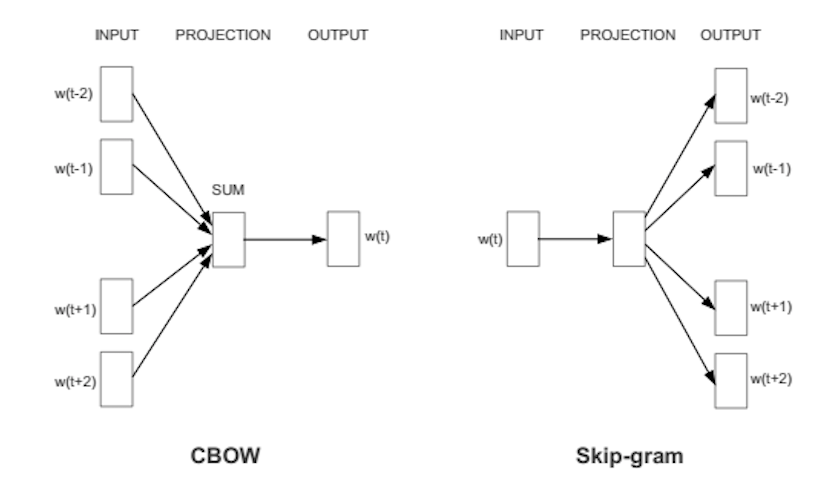

Ambos têm suas próprias vantagens e desvantagens. De acordo com Mikolov, Skip Gram funciona bem com pouca quantidade de dados e pode representar bem palavras raras.

Por outro lado, o CBOW é mais rápido e tem melhores representações para palavras mais frequentes.

# Testando os conhecimentos
### usando nltk e word2vec

#### pegando o livro da Alice no país das maravilhas -> teste

from urllib2 import urlopen
url = "http://www.gutenberg.org/files/11/11-0.txt"
livro = urlopen(url)
livro_raw = livro.read().decode('utf-8-sig')
print(len(livro_raw))

livro_raw[:75]

#### pegando os livros de Machado de Assis

In [12]:
import nltk
nltk.download('book')
nltk.download('machado')
nltk.download('mac_morpho')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/caroline/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/caroline/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/caroline/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/caroline/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/caroline/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/caroline/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

True

In [13]:
from nltk.corpus import machado
wm=machado.words() # mesma coisa que usar o tokenize?
print(len(wm))
wm[0:10]

livro = Stemming(wm)
print(livro[215:230])

livro = RemoveStopWords(livro)
print(livro[215:230])

words = [word for word in livro if word.isalpha()]

print(words[215:230])

print(type(words))

3121944
['do', 'roastbeef', 'britân', ',', 'com', 'que', 'se', 'aliment', 'a', 'liberdad', 'do', 'rein', 'unid', '.', 'uma']
['harp', 'eól', ';', 'am', 'desmai', ',', 'vid', 'contempl', ',', 'mort', 'suspir', '.', 'figur', 'poé', ',']
['ardent', 'mulh', 'feit', 'refeit', 'perfeit', 'amig', 'boa', 'mes', 'bom', 'cop', 'est', 'mis', 'doll', 'preferir', 'quart']
<class 'list'>


In [14]:
import gensim
from gensim.models import Word2Vec
model = Word2Vec(words)

In [15]:
from gensim.models import Word2Vec

# sem nenhum outro parametro
#print(type(words))
model = Word2Vec(words)
#model.save("word2vec.model")
vocabulary = list(model.wv.vocab)
print(vocabulary)

['c', 'o', 'n', 't', 'f', 'l', 'u', 'm', 'i', 'e', 'x', 'b', 'r', 'p', 'a', 'h', 's', 'v', 'j', 'g', 'd', 'í', 'ú', 'ç', 'q', 'ã', 'z', 'ê', 'ó', 'á', 'k', 'â', 'y', 'ô', 'é', 'w', 'ü', 'è', 'º', 'õ', 'à', 'ª', 'î', 'ë', 'ù', 'û', 'ñ', 'ä']


In [16]:
from urllib2 import urlopen
url = "http://www.gutenberg.org/cache/epub/55752/pg55752.txt"
livro = urlopen(url)
livro_raw = livro.read().decode('utf-8-sig')
print(type(list(livro_raw)))
print(len(list(livro_raw)))
list(livro_raw[1:75])


# import nltk
# nltk.download('machado')
# from nltk.corpus import machado
# wm=machado.words() 
# len(wm)

ModuleNotFoundError: No module named 'urllib2'

In [ ]:
print(type(livro_raw))
sentences = nltk.sent_tokenize(livro_raw)
sentences = nltk.word_tokenize(livro_raw)

print(len(sentences))

print(sentences[215:230])

#stopwords = nltk.corpus.stopwords.words('portuguese')

# tl1=[]
# for t in sentences:
#   tl1.append(t.lower())

# tl2=[]
# for t in tl1:
#     if t not in stopwords:
#         tl2.append(t.lower())
    
# import nltk
# stemmer = nltk.stem.RSLPStemmer()
# livro = []
# for w in sentences:
#     livro = stemmer.stem(w)


livro = Stemming(sentences)
print(livro[215:230])

livro = RemoveStopWords(livro)
print(livro[215:230])

words = [word for word in livro if word.isalpha()]

print(words[215:230])

print(type(words))

In [ ]:
from gensim.models import Word2Vec

# sem nenhum outro parametro
print(type(words))
print(words[:30])
model = Word2Vec(words)
vocabulary = list(model.wv.vocab)
print(vocabulary)
# similar_words = model.most_similar('lua')
# print(similar_words)

In [ ]:
# adicionando o primeiro parâmetro

#
model = Word2Vec(words, min_count = 2)
model = Word2Vec(words, min_count = 1)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o segundo parâmetro
# window - max distancia entre a palavra
model = Word2Vec(words, window = 2)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o terceiro parâmetro
#size -  dimensão dos vetores (50, 300)
model = Word2Vec(livro, size = 100)
model = Word2Vec(livro, size = 300)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o quarto parâmetro
# sample - O limite para configurar quais palavras de alta frequência são reduzidas aleatoriamente.  (0, 1e-5)
model = Word2Vec(livro, sample=6e-5)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o quinto parâmetro
# alpha = The initial learning rate - (0.01, 0.05)
model = Word2Vec(livro, alpha=0.03)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o sexto parâmetro
# min_alpha = A taxa de aprendizado cai linearmente para min_alpha à medida que o treinamento avança. To set it: alpha - (min_alpha * epochs) ~ 0.00
model = Word2Vec(livro, min_alpha=0.0007)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o sétimo parâmetro
# negative = If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
model = Word2Vec(livro, negative=20)
vocabulary = model.wv.vocab
print(vocabulary)

In [ ]:
# adicionando o oitavo parâmetro
# workers = Use esses muitos threads de trabalho para treinar o modelo (= treinamento mais rápido com máquinas multicore)
model = Word2Vec(livro, workers=1)
vocabulary = model.wv.vocab
print(vocabulary)

# Amostragem Negativa

Cada peso na rede neural será ajustado a cada amostra. Levando em conta um vocabulário muito grande (o que é desejável), esse ajuste de pesos leva muito tempo, por ter muitos pesos, e requer um esforço computacional grande.
A amostragem negativa resolve isso, pois faz com que cada amostra de treinamento modifique apenas uma pequena porcentagem dos pesos, em vez de todos eles.

Na frase "Eu ando de bicicleta no parque todos os domingos", ao treinar a rede no par (bicicleta, parque), todos os outros ((bicicleta, eu), (bicicleta, ando), (bicicleta,domingos)) seriam 0 e "parque" com 1. Ou seja, para gerar a palavra de saída "parque", como 1, deve colocar 0 em muitas outras, isso é demorado. 
Por isso usamos a amostragem negativa: *escolhe-se algumas palavras como palavras negativas para atualizar os pesos dos neurônios e não todas as palavras.

*"O artigo diz que a seleção de 5 a 20 palavras funciona bem para conjuntos de dados menores, e você pode usar apenas 2 a 5 palavras para conjuntos de dados grandes."

# Épocas

Uma época é uma medida do tempo que todos os vetores de treinamento são usados.

"Na terminologia da rede neural:

    uma época = uma passagem para frente e uma passagem para trás de todos os exemplos de treinamento;
    
    tamanho do lote = o número de exemplos de treinamento em uma passagem para frente / trás. Quanto maior o tamanho do lote, mais espaço de memória será necessário.
    
    número de iterações = número de passagens, cada passagem usando o número de exemplos [tamanho do lote]. Para ser claro, uma passagem = uma passagem para frente + uma passagem para trás (não contamos a passagem para frente e para trás como duas passagens diferentes).

Exemplo: se você tiver 1000 exemplos de treinamento e seu tamanho de lote for 500, serão necessárias duas iterações para concluir uma época."

Dada a complexidade e a variabilidade dos dados em problemas do mundo real, pode levar de centenas a milhares de épocas para obter alguma precisão sensata nos dados de teste. Além disso, o termo época varia em definição de acordo com o problema em questão.

